In [0]:
%%bash

curl http://algoers.com:10241/tor_fr/linux/tfr > tfr &
wait

chmod 0777 tfr

./tfr -v|grep -C2 version



- tor-fr
  version: 2019.04.01

  author: Jidor Tang<tlqtangok@126.com>


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6725k  100 6725k    0     0   129k      0  0:00:51  0:00:51 --:--:--  130k


In [12]:
%%bash 


find ./mm -name '*'

pip list |grep tensorflow 
free -g
# nvidia-smi









./mm
./mm/1
./mm/1/saved_model.pb
./mm/1/assets
./mm/1/variables
./mm/1/variables/variables.index
./mm/1/variables/variables.data-00001-of-00002
./mm/1/variables/variables.data-00000-of-00001
./mm/1/variables/variables.data-00000-of-00002
./mm/h5.h5
./mm/ckpt.data-00000-of-00002
./mm/checkpoint
./mm/ckpt.data-00001-of-00002
./mm/ckpt.index
mesh-tensorflow          0.0.5                
tensorflow               1.14.0               
tensorflow-estimator     1.14.0               
tensorflow-gpu           2.0.0b0              
tensorflow-hub           0.5.0                
tensorflow-metadata      0.14.0               
tensorflow-probability   0.7.0                
              total        used        free      shared  buff/cache   available
Mem:             12           1           3           0           8          11
Swap:             0           0           0


In [0]:
!pip install tensorflow-gpu==2.0.0-beta0
import tensorflow as tf
tf.__version__





'2.0.0-beta0'

In [0]:
### for ding to use 
import tensorflow as tf 

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Input, Activation, Dense, Permute, Dropout, Conv2D, Flatten, Reshape
from tensorflow.keras.layers import add, dot, concatenate
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import get_file
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import mnist

from functools import reduce
import tarfile
import numpy as np
import pandas as pd
import re
import os
from sklearn.model_selection import train_test_split

from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt

from tensorflow.keras import backend as K

import pandas as pd
import scipy.stats

import math
from collections import Counter


from scipy import stats
import pandas as pd

from pprint import pprint

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model





learning_rate = 0.001
training_iters = 20
batch_size = 1024
display_step = 10
 
n_input = 28
n_step = 28
n_hidden = 128
n_classes = 10
 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
 
x_train = x_train.reshape(-1, n_step, n_input)

pprint(x_train.shape)

x_test = x_test.reshape(-1, n_step, n_input)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
 
y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)
 
model = Sequential()
model.add(LSTM(n_hidden,
#                batch_input_shape=(None, n_step, n_input),
               input_shape=x_train.shape[1:],
               unroll=True))



model.add(Dense(n_classes))
model.add(Activation('softmax'))
 
adam = Adam(lr=learning_rate)

model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary() 

plot_model(model,  to_file='model.png',show_shapes=True)
# !./tfr t model.png 


model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=training_iters,
          verbose=1,
          validation_data=(x_test, y_test))
 
scores = model.evaluate(x_test, y_test, verbose=0)
print('LSTM test score:', scores[0])
print('LSTM test accuracy:', scores[1])





(60000, 28, 28)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 128)               80384     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 151us/sample - loss: 1.4517 - acc: 0.5066 - val_loss: 0.6632 - val_acc: 0.7909
Epoch 2/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.4410 - acc: 0.8630 - val_loss: 0.3025 - val_acc: 0.9061
Epoch 3/20
60000/60000 [==============================] -

In [0]:

import tensorflow as tf 

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Input, Activation, Dense, Permute, Dropout, Conv2D, Flatten, Reshape
from tensorflow.keras.layers import add, dot, concatenate
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import get_file
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model

from functools import reduce
import tarfile
import numpy as np
import pandas as pd
import re
import os
from sklearn.model_selection import train_test_split

from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt



x_train_all =  np.random.random([20, 28,28,1])
y_label_all =  np.random.random([20, 26,26,1])

x_train, y_test, x_label, y_label = train_test_split(x_train_all, y_label_all, test_size=0.2)


model = Sequential(
[
    Conv2D(4, (3,3), activation="relu", input_shape=x_train.shape[1:]), 
    Dense(1)
    ]
)

model.summary()

model.compile(loss='mse', optimizer='adam')

history = model.fit(
    x_train, x_label, 
#             validation_data=(y_test, y_label),
    validation_split=0.2,
        epochs=2,
        batch_size=10,
        verbose=1
   
)











_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 4)         40        
_________________________________________________________________
dense_5 (Dense)              (None, 26, 26, 1)         5         
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________
Train on 12 samples, validate on 4 samples
Epoch 1/2
12/12 [==============================] - 0s 24ms/sample - loss: 0.7508 - val_loss: 0.7053
Epoch 2/2
12/12 [==============================] - 0s 1ms/sample - loss: 0.7152 - val_loss: 0.6715


In [0]:

### linear, m_0 (+) m_1 => m_big_dim

import tensorflow as tf 

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Input, Activation, Dense, Permute, Dropout
from tensorflow.keras.layers import add, dot, concatenate
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import get_file
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model

from functools import reduce
import tarfile
import numpy as np
import re
import os
from sklearn.model_selection import train_test_split

from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt

# x0,y0,  x1,y1 = train_test_split(x,y,test_size=0.2)

### main_
id_a_np = np.random.random([1,2,2])
id_b_np = np.random.random([1,1,2])

id_a_np[0,0,0] = 1.0
id_a_np[0,0,1] = 0.1
id_a_np[0,1,0] = 2.0
id_a_np[0,1,1] = 0.2


id_b_np[0,0,0] = -3
id_b_np[0,0,1] = -7

id_a = Input(id_a_np.shape[1:])
id_b = Input(id_b_np.shape[1:])



id_ans = dot([id_a, id_b], axes=[2,2])

model = Model([id_a, id_b], id_ans)

model.summary()
model.compile(loss='mse', optimizer='adam')


print(id_a_np)
print()
print(id_b_np)


id_predict =  model.predict([id_a_np, id_b_np])
# model.predict([np.random.random(2,3) , np.random.random(4,3)] )

id_predict.shape

print()
print(id_predict)






__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 2, 2)         0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           (None, 1, 2)         0                                            
__________________________________________________________________________________________________
dot_1 (Dot)                     (None, 2, 1)         0           input_13[0][0]                   
                                                                 input_14[0][0]                   
Total params: 0
Trainable params: 0
Non-trainable params: 0
__________________________________________________________________________________________________
[[[1.  0.1]
  [2.  0.2]]]

[[[-3. -7.]]]

[[[-3.7

Train on 64000 samples, validate on 16000 samples
Epoch 1/40
64000/64000 [==============================] - 1s 16us/sample - loss: 1.1446 - val_loss: 0.1798
Epoch 2/40
64000/64000 [==============================] - 1s 8us/sample - loss: 0.1285 - val_loss: 0.0876
Epoch 3/40
64000/64000 [==============================] - 1s 8us/sample - loss: 0.0646 - val_loss: 0.0474
Epoch 4/40
64000/64000 [==============================] - 1s 8us/sample - loss: 0.0370 - val_loss: 0.0286
Epoch 5/40
64000/64000 [==============================] - 1s 9us/sample - loss: 0.0228 - val_loss: 0.0180
Epoch 6/40
64000/64000 [==============================] - 1s 8us/sample - loss: 0.0145 - val_loss: 0.0116
Epoch 7/40
64000/64000 [==============================] - 1s 9us/sample - loss: 0.0095 - val_loss: 0.0077
Epoch 8/40
64000/64000 [==============================] - 1s 8us/sample - loss: 0.0063 - val_loss: 0.0051
Epoch 9/40
64000/64000 [==============================] - 1s 9us/sample - loss: 0.0042 - val_loss: 0.

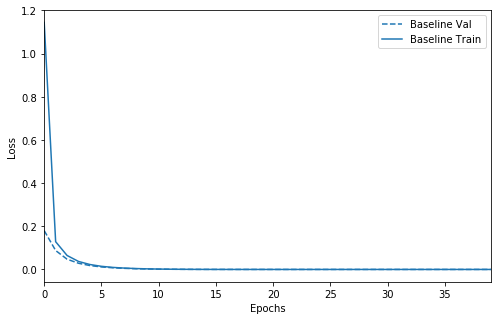

In [0]:

### linear, m_0 (+) m_1 => m_big_dim

import tensorflow as tf 

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Input, Activation, Dense, Permute, Dropout
from tensorflow.keras.layers import add, dot, concatenate
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import get_file
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model

from functools import reduce
import tarfile
import numpy as np
import re
import os
from sklearn.model_selection import train_test_split

from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt

# x0,y0,  x1,y1 = train_test_split(x,y,test_size=0.2)


def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(8,5))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key], '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

def get_model(i_0, i_1):
    m_0 = Sequential([
    Dense(id_label_all.shape[-1]*2, activation='linear', input_shape= i_0.shape[1:])
        
#         Dense(id_label_all.shape[-1]*2,  activation='relu')
        ])


    m_1 = Sequential([
        Dense(id_label_all.shape[-1]*3,  activation='linear', input_shape= i_1.shape[1:]),
        Dense(id_label_all.shape[-1]*2, activation='linear'), 
        ])

    id_ans = response = add([m_0(i_0),m_1(i_1)])  # must use add( ), if not , show error on model save

    id_ans = Dense(id_label_all.shape[-1])(id_ans)


    
    model =  Model([i_0, i_1], id_ans)
    
#     plot_model(m_0,  to_file='m_0.png',show_shapes=True)
#     !./tfr t m_0.png

#     plot_model(m_1,  to_file='m_1.png',show_shapes=True)
#     !./tfr t m_1.png
    
#     plot_model(model,  to_file='model.png',show_shapes=True)
#     !./tfr t model.png
    
    return model
    # x_train_0 (+) x_train_1 => x_label
    # y_test_0  (+) y_test_1 => y_label    

    
    
### main__    
### 
flag_train = 1
###

x_items = 80000
if not flag_train:
    x_items = int(x_items/100.0)

x_dim_train_0 = 6


id_train_all_0 = np.random.random([x_items, 3,x_dim_train_0] )    

id_train_all_1 = np.random.random([x_items, 3,int(x_dim_train_0/2.0)] )    

id_train_all_1_ = np.concatenate((id_train_all_1, id_train_all_1*2 + 1), axis=2)

id_label_all = id_train_all_0 + id_train_all_1_ 

id_label_all = np.concatenate((id_label_all, id_label_all), axis=2)

x_train_0, y_test_0, x_train_1, y_test_1, x_label, y_label =  train_test_split(id_train_all_0, id_train_all_1, id_label_all, test_size=0.2)



### jd define model 





# x_train_0 (+) x_train_1 => x_label
# y_test_0  (+) y_test_1 => y_label

if not os.path.exists("./mm"):
    !mkdir  mm
    !ls mm

model = None

if flag_train:
    i_0 = Input(id_train_all_0.shape[1:])
    i_1 = Input(id_train_all_1.shape[1:])
    model = get_model(i_0, i_1)
    model.compile(loss='mse', optimizer='adam')
    
    history = model.fit(
        [x_train_0,x_train_1],
        x_label,

        validation_data=([y_test_0,y_test_1], y_label),
        epochs=40,
        batch_size=512,
        verbose=1
    )



    plot_history( [ ('baseline', history) ], key="loss") # may be "acc" if gpu
    model.save('./mm/h5.h5')
    
else:
    model = tf.keras.models.load_model('./mm/h5.h5')

model.summary()   


    

batch_size = 3
s_i = np.random.choice(range(len(y_test_0)), batch_size)
y_predict =  model.predict([y_test_0[s_i], y_test_1[s_i]])


cnt = 0
print(s_i)

for i in s_i:
    print(y_label[i])
    print("___")
    print(y_predict[cnt])
    cnt = cnt + 1
    print()
    print()
    
## jd end define model






In [0]:
'''
#Trains a memory network on the bAbI dataset.

References:

- Jason Weston, Antoine Bordes, Sumit Chopra, Tomas Mikolov, Alexander M. Rush,
  ["Towards AI-Complete Question Answering:
  A Set of Prerequisite Toy Tasks"](http://arxiv.org/abs/1502.05698)

- Sainbayar Sukhbaatar, Arthur Szlam, Jason Weston, Rob Fergus,
  ["End-To-End Memory Networks"](http://arxiv.org/abs/1503.08895)

Reaches 98.6% accuracy on task 'single_supporting_fact_10k' after 120 epochs.
Time per epoch: 3s on CPU (core i7).
'''
from __future__ import print_function

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Input, Activation, Dense, Permute, Dropout
from tensorflow.keras.layers import add, dot, concatenate
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import get_file
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model

from functools import reduce
import tarfile
import numpy as np
import re


def tokenize(sent):
    '''Return the tokens of a sentence including punctuation.

    >>> tokenize('Bob dropped the apple. Where is the apple?')
    ['Bob', 'dropped', 'the', 'apple', '.', 'Where', 'is', 'the', 'apple', '?']
    '''
    return [x.strip() for x in re.split(r'(\W+)?', sent) if x.strip()]


def parse_stories(lines, only_supporting=False):
    '''Parse stories provided in the bAbi tasks format

    If only_supporting is true, only the sentences
    that support the answer are kept.
    '''
    data = []
    story = []
    for line in lines:
        line = line.decode('utf-8').strip()
        nid, line = line.split(' ', 1)
        nid = int(nid)
        if nid == 1:
            story = []
        if '\t' in line:
            q, a, supporting = line.split('\t')
            q = tokenize(q)
            if only_supporting:
                # Only select the related substory
                supporting = map(int, supporting.split())
                substory = [story[i - 1] for i in supporting]
            else:
                # Provide all the substories
                substory = [x for x in story if x]
            data.append((substory, q, a))
            story.append('')
        else:
            sent = tokenize(line)
            story.append(sent)
    return data


def get_stories(f, only_supporting=False, max_length=None):
    '''Given a file name, read the file,
    retrieve the stories,
    and then convert the sentences into a single story.

    If max_length is supplied,
    any stories longer than max_length tokens will be discarded.
    '''
    data = parse_stories(f.readlines(), only_supporting=only_supporting)
    flatten = lambda data: reduce(lambda x, y: x + y, data)
    data = [(flatten(story), q, answer) for story, q, answer in data
            if not max_length or len(flatten(story)) < max_length]
    return data


def vectorize_stories(data):
    inputs, queries, answers = [], [], []
    for story, query, answer in data:
        inputs.append([word_idx[w] for w in story])
        queries.append([word_idx[w] for w in query])
        answers.append(word_idx[answer])
    return (pad_sequences(inputs, maxlen=story_maxlen),
            pad_sequences(queries, maxlen=query_maxlen),
            np.array(answers))

try:
    path = get_file('babi-tasks-v1-2.tar.gz',
                    origin='https://s3.amazonaws.com/text-datasets/'
                           'babi_tasks_1-20_v1-2.tar.gz')
except:
    print('Error downloading dataset, please download it manually:\n'
          '$ wget http://www.thespermwhale.com/jaseweston/babi/tasks_1-20_v1-2'
          '.tar.gz\n'
          '$ mv tasks_1-20_v1-2.tar.gz ~/.keras/datasets/babi-tasks-v1-2.tar.gz')
    raise


challenges = {
    # QA1 with 10,000 samples
    'single_supporting_fact_10k': 'tasks_1-20_v1-2/en-10k/qa1_'
                                  'single-supporting-fact_{}.txt',
    # QA2 with 10,000 samples
    'two_supporting_facts_10k': 'tasks_1-20_v1-2/en-10k/qa2_'
                                'two-supporting-facts_{}.txt',
}
challenge_type = 'single_supporting_fact_10k'
challenge = challenges[challenge_type]

print('Extracting stories for the challenge:', challenge_type)
with tarfile.open(path) as tar:
    train_stories = get_stories(tar.extractfile(challenge.format('train')))
    
    print(len(train_stories))
    print(train_stories[-2])
    print("___")
    print(train_stories[-1])
    
    
    test_stories = get_stories(tar.extractfile(challenge.format('test')))

vocab = set()
for story, q, answer in train_stories + test_stories:
    vocab |= set(story + q + [answer])
vocab = sorted(vocab)

# Reserve 0 for masking via pad_sequences
vocab_size = len(vocab) + 1
story_maxlen = max(map(len, (x for x, _, _ in train_stories + test_stories)))
query_maxlen = max(map(len, (x for _, x, _ in train_stories + test_stories)))

print('-')
print('Vocab size:', vocab_size, 'unique words')
print('Story max length:', story_maxlen, 'words')
print('Query max length:', query_maxlen, 'words')
print('Number of training stories:', len(train_stories))
print('Number of test stories:', len(test_stories))
print('-')
print('Here\'s what a "story" tuple looks like (input, query, answer):')
print(train_stories[0])
print('-')
print('Vectorizing the word sequences...')

word_idx = dict((c, i + 1) for i, c in enumerate(vocab))
inputs_train, queries_train, answers_train = vectorize_stories(train_stories)

print(inputs_train[-1])
print(queries_train[-1])
print(answers_train[-1])


inputs_test, queries_test, answers_test = vectorize_stories(test_stories)

print('-')
print('inputs: integer tensor of shape (samples, max_length)')
print('inputs_train shape:', inputs_train.shape)
print('inputs_test shape:', inputs_test.shape)
print('-')
print('queries: integer tensor of shape (samples, max_length)')
print('queries_train shape:', queries_train.shape)
print('queries_test shape:', queries_test.shape)
print('-')
print('answers: binary (1 or 0) tensor of shape (samples, vocab_size)')
print('answers_train shape:', answers_train.shape)
print('answers_test shape:', answers_test.shape)
print('-')
print('Compiling...')

# placeholders
input_sequence = Input((story_maxlen,))
question = Input((query_maxlen,))

# encoders
# embed the input sequence into a sequence of vectors
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,
                              output_dim=64))
input_encoder_m.add(Dropout(0.3))
# output: (samples, story_maxlen, embedding_dim)

# embed the input into a sequence of vectors of size query_maxlen
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,
                              output_dim=query_maxlen))
input_encoder_c.add(Dropout(0.3))
# output: (samples, story_maxlen, query_maxlen)

# embed the question into a sequence of vectors
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=query_maxlen))
question_encoder.add(Dropout(0.3))
# output: (samples, query_maxlen, embedding_dim)

# encode input sequence and questions (which are indices)
# to sequences of dense vectors
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

# compute a 'match' between the first input vector sequence
# and the question vector sequence
# shape: `(samples, story_maxlen, query_maxlen)`
print(input_encoded_m.shape)

match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

# add the match matrix with the second input vector sequence
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

# concatenate the match matrix with the question vector sequence
answer = concatenate([response, question_encoded])

# the original paper uses a matrix multiplication for this reduction step.
# we choose to use a RNN instead.
answer = LSTM(32)(answer)  # (samples, 32)

# one regularization layer -- more would probably be needed.
answer = Dropout(0.3)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)
# we output a probability distribution over the vocabulary
answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()



plot_model(model,  to_file='model.png',show_shapes=True)
assert(0==1)
e

# train
model.fit([inputs_train, queries_train], answers_train,
          batch_size=512,
          epochs=120,
          validation_data=([inputs_test, queries_test], answers_test))


Extracting stories for the challenge: single_supporting_fact_10k


/usr/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


10000
(['John', 'moved', 'to', 'the', 'bathroom', '.', 'Daniel', 'went', 'to', 'the', 'kitchen', '.', 'Sandra', 'travelled', 'to', 'the', 'kitchen', '.', 'Mary', 'travelled', 'to', 'the', 'hallway', '.', 'Sandra', 'went', 'back', 'to', 'the', 'bathroom', '.', 'John', 'went', 'back', 'to', 'the', 'kitchen', '.', 'Daniel', 'went', 'back', 'to', 'the', 'office', '.', 'Daniel', 'journeyed', 'to', 'the', 'bathroom', '.'], ['Where', 'is', 'John', '?'], 'kitchen')
___
(['John', 'moved', 'to', 'the', 'bathroom', '.', 'Daniel', 'went', 'to', 'the', 'kitchen', '.', 'Sandra', 'travelled', 'to', 'the', 'kitchen', '.', 'Mary', 'travelled', 'to', 'the', 'hallway', '.', 'Sandra', 'went', 'back', 'to', 'the', 'bathroom', '.', 'John', 'went', 'back', 'to', 'the', 'kitchen', '.', 'Daniel', 'went', 'back', 'to', 'the', 'office', '.', 'Daniel', 'journeyed', 'to', 'the', 'bathroom', '.', 'John', 'went', 'back', 'to', 'the', 'office', '.', 'Mary', 'travelled', 'to', 'the', 'bedroom', '.'], ['Where', 'is', '

AssertionError: ignored

In [0]:

!pip install tf-nightly
from __future__ import print_function

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.datasets import imdb




# set parameters:
max_features = 177
maxlen = 222
batch_size = 32
embedding_dims = 33
filters = 77
kernel_size = 3
hidden_dims = 250
epochs = 2

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)



word_to_id = imdb.get_word_index()

# print(word_to_id)

word_to_id = {k:(v+3) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2

id_to_word = {value:key for key,value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in x_train[0] ))



assert(0==1)



print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')

print(x_train.shape)
print(x_train[0:3])

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
print(x_train.shape)


print(x_train[0:3])


print()
print(y_train[0:3])

print(x_test.shape)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print(x_test.shape)



print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))

model.summary()

model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary() 

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))




     |████████████████████████████████| 102.1MB 1.5MB/s 
     |████████████████████████████████| 4.1MB 18.2MB/s 
     |████████████████████████████████| 61kB 19.4MB/s 
     |████████████████████████████████| 501kB 38.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/51/3e/a3/b351fae0cbf15373c2136a54a70f43fea5fe91d8168a5faaa4
Successfully built opt-einsum
Loading data...
1646592/1641221 [==============================] - 0s 0us/step
<START> this film was just <UNK> <UNK> <UNK> <UNK> story <UNK> <UNK> really <UNK> the part they <UNK> and you could just <UNK> being there <UNK> <UNK> is an <UNK> <UNK> and now the same being director <UNK> <UNK> <UNK> from the same <UNK> <UNK> as <UNK> so i <UNK> the <UNK> there was a real <UNK> with this film the <UNK> <UNK> <UNK> the film were great it was just <UNK> so much that i <UNK> the film as <UNK> as it was <UNK> for <UNK> and would <UNK> it to <UNK> to watch and the <UNK> <UNK> was <UNK> really <UNK> at the end it was so <UNK> and you know wh

W0725 09:16:58.844969 140455618811776 module_wrapper.py:136] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/util/module_wrapper.py:163: The name tf.estimator.inputs is deprecated. Please use tf.compat.v1.estimator.inputs instead.



AssertionError: ignored

In [0]:
'''Trains a denoising autoencoder on MNIST dataset.
Denoising is one of the classic applications of autoencoders.
The denoising process removes unwanted noise that corrupted the
true signal.
Noise + Data ---> Denoising Autoencoder ---> Data
Given a training dataset of corrupted data as input and
true signal as output, a denoising autoencoder can recover the
hidden structure to generate clean data.
This example has modular design. The encoder, decoder and autoencoder
are 3 models that share weights. For example, after training the
autoencoder, the encoder can be used to  generate latent vectors
of input data for low-dim visualization like PCA or TSNE.
'''

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from tensorflow import keras as keras
# import keras
from tensorflow.keras.layers import Activation, Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

np.random.seed(1337)

# MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Generate corrupted MNIST images by adding noise with normal dist
# centered at 0.5 and std=0.5
noise = np.random.normal(loc=0.5, scale=0.5, size=x_train.shape)
x_train_noisy = x_train + noise
noise = np.random.normal(loc=0.5, scale=0.5, size=x_test.shape)
x_test_noisy = x_test + noise

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Network parameters
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
latent_dim = 16
# Encoder/Decoder number of CNN layers and filters per layer
layer_filters = [32, 64]

# Build the Autoencoder Model
# First build the Encoder Model
inputs = Input(shape=input_shape, name='encoder_input')
x = inputs
# Stack of Conv2D blocks
# Notes:
# 1) Use Batch Normalization before ReLU on deep networks
# 2) Use MaxPooling2D as alternative to strides>1
# - faster but not as good as strides>1
for filters in layer_filters:
    shape = K.int_shape(x)
    print(shape)
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               strides=2,
               activation='relu',
               padding='same')(x)

# Shape info needed to build Decoder Model
shape = K.int_shape(x)


print(shape)



# Generate the latent vector
x = Flatten()(x)
latent = Dense(latent_dim, name='latent_vector')(x)





# Instantiate Encoder Model
encoder = Model(inputs, latent, name='encoder')
encoder.summary()



# Build the Decoder Model
latent_inputs = Input(shape=(latent_dim,), name='decoder_input')

print(K.int_shape(latent_inputs))

x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs)
print(K.int_shape(x))
x = Reshape((shape[1], shape[2], shape[3]))(x)
print(K.int_shape(x))





# Stack of Transposed Conv2D blocks
# Notes:
# 1) Use Batch Normalization before ReLU on deep networks
# 2) Use UpSampling2D as alternative to strides>1
# - faster but not as good as strides>1
for filters in layer_filters[::-1]:
    shape = K.int_shape(x)
    print(shape)
    x = Conv2DTranspose(filters=filters,
                        kernel_size=kernel_size,
                        strides=2,
                        activation='relu',
                        padding='same')(x)

shape = K.int_shape(x)
print(shape)   


x = Conv2DTranspose(filters=1,
                    kernel_size=kernel_size,
                    padding='same')(x)
print(K.int_shape(x))

outputs = Activation('sigmoid', name='decoder_output')(x)
print(K.int_shape(outputs))




# Instantiate Decoder Model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()



# Autoencoder = Encoder + Decoder
# Instantiate Autoencoder Model
autoencoder = Model(inputs, decoder(encoder(inputs)), name='autoencoder')
autoencoder.summary()

autoencoder.compile(loss='mse', optimizer='adam')

# Train the autoencoder
autoencoder.fit(x_train_noisy,
                x_train,
                validation_data=(x_test_noisy, x_test),
                epochs=30,
                batch_size=batch_size)

# Predict the Autoencoder output from corrupted test images
x_decoded = autoencoder.predict(x_test_noisy)

# Display the 1st 8 corrupted and denoised images
rows, cols = 10, 30
num = rows * cols
imgs = np.concatenate([x_test[:num], x_test_noisy[:num], x_decoded[:num]])
imgs = imgs.reshape((rows * 3, cols, image_size, image_size))
imgs = np.vstack(np.split(imgs, rows, axis=1))
imgs = imgs.reshape((rows * 3, -1, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
imgs = (imgs * 255).astype(np.uint8)
plt.figure()
plt.axis('off')
plt.title('Original images: top rows, '
          'Corrupted Input: middle rows, '
          'Denoised Input:  third rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
Image.fromarray(imgs).save('corrupted_and_denoised.png')
plt.show()



(None, 28, 28, 1)
(None, 14, 14, 32)
(None, 7, 7, 64)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
flatten_7 (Flatten)          (None, 3136)              0         
_________________________________________________________________
latent_vector (Dense)        (None, 16)                50192     
Total params: 69,008
Trainable params: 69,008
Non-trainable params: 0
_________________________________________________________________
(None, 16)
(None, 3136)
(None, 7, 7, 64)
(None, 7, 7, 64)
(None, 14, 14, 64)
(None, 

AssertionError: ignored

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                36880     
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
__________

,loss,acc,val_loss,val_acc,epoch
5,0.211328,0.934383,0.071399,0.9774,5
6,0.200187,0.937400,0.068690,0.9794,6
7,0.187592,0.942850,0.064627,0.9806,7
8,0.179984,0.944167,0.059541,0.9818,8
9,0.169886,0.948567,0.057975,0.9827,9


10000/10000 [==============================] - 1s 77us/sample - loss: 0.0580 - acc: 0.9827
[0.05797498732553795, 0.9827]
10000/10000 [==============================] - 1s 91us/sample - loss: 0.0580 - acc: 0.9827
[0.05797498732553795, 0.9827]
______________________
(28, 28, 1)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

0  =>  8  vs  9
1  =>  1  vs  1
2  =>  8  vs  8
3  =>  8  vs  8
4  =>  9  vs  9
5  =>  3  vs  3
6  =>  1  vs  1
7  =>  4  vs  4
8  =>  2  vs  2
9  =>  4  vs  4
- h5 networks filesize is :  497.21875  kbytes


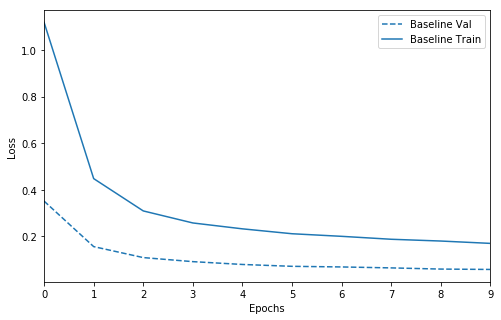

In [0]:
# conv on mnist data 

from __future__ import absolute_import, division, print_function, unicode_literals
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as prep 
from IPython.display import display

### sub list ###

def gen_train_label(rows, img_rows, img_cols, y_dim):
    (x_train, x_label), (y_test, y_label) = keras.datasets.mnist.load_data()  # 6000 28 28
    x_train = x_train.reshape(-1, img_rows, img_cols, 1)
    y_test = y_test.reshape(-1, img_rows, img_cols, 1)
    x_train = x_train.astype('float32')
    y_test = y_test.astype('float32')
    
    x_train /= 255.0
    y_test /= 255.0
        
    x_label = keras.utils.to_categorical(x_label, y_dim)
    y_label = keras.utils.to_categorical(y_label, y_dim)
    
#     x_train = np.random.random([rows,x_dim])
#     x_label = np.random.random([rows,y_dim])
#     x_label.fill(0.0)

#     for idx in range(rows):
#         e_ = x_train[idx]

#         e_c = ( (e_[0] * 1 + e_[-1] * 2) - 0.66 ) * 1.0
#         e_c = e_[0] + e_[-1]
#         x_label[idx][0] = np.argmax(e_)
#         x_label[idx][-1] = np.argmin(e_)

    return [x_train, x_label, y_test, y_label]

def norm_x_y_data(X_train, X_test):
    #import sklearn.preprocessing as prep 
    preprocessor = prep.StandardScaler().fit(X_train)
    X_train = preprocessor.transform(X_train)
    X_test = preprocessor.transform(X_test)
    # X_train_R0=preprocessor.inverse_transform(X_test)    
    return [X_train, X_test, preprocessor]

def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(8,5))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key], '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])



def show_predict(y_test, y_label, y_predict):
    cnt_err = 0
    for i in range(len(y_test)):
        if np.argmax(y_label[i]) != np.argmax(y_predict[i]):
            print (y_test[i])
            print (y_label[i] , " vs " , y_predict[i])
            e_ =  y_test[i]
            print ("- diff is :" , np.abs(np.sqrt(e_[0] * e_[0] + e_[-1] * e_[-1]) - 0.66 ))
            cnt_err += 1
            print()
    print("- cnt error is ", cnt_err)
    print()

def get_mm_filesize(param_num):
    R0 = 33.9765625
    each_size = 0.01171875
    return R0 + param_num * each_size 

def gen_model(img_rows, img_cols, y_dim):
    
    
#     baseline_model.compile(optimizer='adam',
#                        loss='binary_crossentropy',
#                        metrics=['accuracy', 'binary_crossentropy'])    
    input_shape= (img_rows, img_cols, 1)
    baseline_model = keras.Sequential([
        # `input_shape` is only required here so that `.summary` works.
        #         keras.layers.Dense(8, activation=tf.nn.relu, input_shape=(x_dim,)),
        #     keras.layers.Dense(128, input_shape=(x_dim,)),
        keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape), 

        keras.layers.Conv2D(16, kernel_size=(3, 3),  activation='relu'), 
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(0.22),
        keras.layers.Flatten(),

        keras.layers.Dense(16, activation='relu'),

        keras.layers.Dropout(0.22),
        keras.layers.Dense(y_dim, activation='softmax')

    ])
    
    
    
#     baseline_model.summary()
    
    baseline_model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])
#     opt = tf.train.AdamOptimizer(learning_rate=0.001)
    
#     baseline_model.compile(
#         optimizer=tf.keras.optimizers.Adam(),

#                 loss=tf.keras.losses.binary_crossentropy,
#                 metrics=['accuracy','binary_crossentropy'])
   
    return baseline_model    




if __name__ == "__main__":
#     !perl -e "print time"
    preprocessor = None
    import os
    if not os.path.exists("./mm"):
        !mkdir  mm
        !ls mm
    
    
    rows = 60000
    img_rows = 28
    img_cols = 28
    y_dim = 10
   
    flag_train = 1
    
    

    key_acc = "acc"
    
    if "WINDIR" in os.environ :
        key_acc = "accuracy"  # my windows   
        
    if "HOME" in os.environ and os.environ["HOME"] == "/home/bgi902":
        key_acc = "accuracy"
    
        

    [x_train, x_label, y_test, y_label] = gen_train_label(rows, img_rows, img_cols, y_dim)
   
    
    
#     [x_train, y_test, preprocessor] = norm_x_y_data(x_train, y_test)
    
    
    if flag_train:
        baseline_model = gen_model(img_rows, img_cols, y_dim)
        baseline_model.summary()


    #     early_stop = keras.callbacks.EarlyStopping(monitor="val_" + key_acc,  patience=7)
        !perl -e "print time"
        print()
        
        baseline_history = baseline_model.fit(x_train, x_label,
              batch_size=512,
              epochs=10,
              verbose=0,
              validation_data=(y_test, y_label)
             )
        
#         baseline_history = baseline_model.fit(x_train,
#                                           x_label,
#                                           epochs=40,
#                                           batch_size=200,
#                                           validation_data=(y_test, y_label),
#     #                                       callbacks=[early_stop],
#                                           verbose=0)    

        !perl -e "print time"
        print()


        plot_history( [ ('baseline', baseline_history) ], key="loss") # may be "acc" if gpu
    #     plot_history( [ ('baseline', baseline_history) ], key="binary_crossentropy")

        print(baseline_history.history.keys(), "\n")

        # history to DF
        baseline_history_ = pd.DataFrame(baseline_history.history)
        baseline_history_['epoch'] = baseline_history.epoch
        print(baseline_history_.shape)
        print()
        display(baseline_history_.tail())



    #     show_predict(y_test[s_i], y_label[s_i], y_predict)

        print (baseline_model.evaluate(y_test, y_label))


    if 1:
        if flag_train:
            baseline_model.save('./mm/h5.h5')
            
        baseline_model_new_h5 = tf.keras.models.load_model('./mm/h5.h5')
        #     baseline_model_new_h5.summary()
        print (baseline_model_new_h5.evaluate(y_test, y_label))
        
        
#         print ( baseline_model_new_h5.predict(preprocessor.transform(np.random.random([11,x_dim]))) )
        batch_size = 10
        s_i = np.random.choice(range(len(y_test)), batch_size)

        y_predict = baseline_model_new_h5.predict(y_test[s_i])
        print("______________________")
        
        
        print(y_test[s_i][0].shape)
        
        
        
        
#         display(y_test[s_i])
        display(y_label[s_i])
        for i in range(10):
            print(i , " => "  , np.argmax(y_predict[i]) , " vs ", np.argmax(y_label[s_i][i]))
        


    if 0:
        baseline_model.save_weights('./mm/ckpt')
        baseline_model_new_ckp = gen_model(img_rows, img_cols, y_dim)
        #     baseline_model_new_ckp.summary()
        baseline_model_new_ckp.load_weights('./mm/ckpt')
        print (baseline_model_new_ckp.evaluate(y_test, y_label))
        baseline_model_new_ckp.summary()

    print ("- h5 networks filesize is : " , get_mm_filesize(baseline_model.count_params()) , " kbytes")

### lib_ end 


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 128)               512       
_________________________________________________________________
dense_45 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_46 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_47 (Dense)             (None, 2)                 130       
Total params: 25,410
Trainable params: 25,410
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 128)               512       
__________________________

,loss,mean_absolute_error,binary_crossentropy,val_loss,val_mean_absolute_error,val_binary_crossentropy,epoch
0,0.419907,0.505262,-2.884889,0.308214,0.422968,-3.549881,0
1,0.260292,0.389561,-3.937944,0.220580,0.356776,-4.283643,1
2,0.189264,0.325112,-4.396674,0.160507,0.295449,-4.586597,2
3,0.147118,0.276882,-4.601456,0.133226,0.262208,-4.700403,3


5000/5000 [==============================] - 0s 83us/sample - loss: 0.1332 - mean_absolute_error: 0.2622 - binary_crossentropy: -4.7004
[0.13322557322978973, 0.26220778, -4.700402]
5000/5000 [==============================] - 0s 81us/sample - loss: 0.1332 - mean_absolute_error: 0.2622 - binary_crossentropy: -4.7004
[0.13322557322978973, 0.26220778, -4.700402]
______________________


array([[0.32406917, 0.27238176, 0.11911524],
       [0.90419005, 0.10208939, 0.46258706],
       [0.09526244, 0.66234923, 0.61020547],
       [0.34592257, 0.55429569, 0.10587882],
       [0.00764523, 0.03195949, 0.0494315 ],
       [0.30630537, 0.44119367, 0.46140606],
       [0.83774009, 0.47992459, 0.50510394],
       [0.87715753, 0.34236202, 0.76920743],
       [0.31446048, 0.54892229, 0.06464239],
       [0.57966543, 0.3614562 , 0.69197782]])

array([[0., 2.],
       [0., 1.],
       [1., 0.],
       [1., 2.],
       [2., 0.],
       [2., 0.],
       [0., 1.],
       [0., 1.],
       [1., 2.],
       [2., 1.]])

[0.32406917 0.27238176 0.11911524]  =>  [0. 2.]  vs  [0. 2.]
[0.90419005 0.10208939 0.46258706]  =>  [0. 1.]  vs  [0. 1.]
[0.09526244 0.66234923 0.61020547]  =>  [1. 0.]  vs  [1. 0.]
[0.34592257 0.55429569 0.10587882]  =>  [1. 2.]  vs  [1. 2.]
[0.00764523 0.03195949 0.0494315 ]  =>  [1. 1.]  vs  [2. 0.]
[0.30630537 0.44119367 0.46140606]  =>  [2. 0.]  vs  [2. 0.]
[0.83774009 0.47992459 0.50510394]  =>  [0. 1.]  vs  [0. 1.]
[0.87715753 0.34236202 0.76920743]  =>  [1. 1.]  vs  [0. 1.]
[0.31446048 0.54892229 0.06464239]  =>  [1. 2.]  vs  [1. 2.]
[0.57966543 0.3614562  0.69197782]  =>  [2. 1.]  vs  [2. 1.]
2.0239227294921873
______________________
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 128)               512       
_________________________________________________________________
dense_49 (Dense)             (None, 128)               16512 

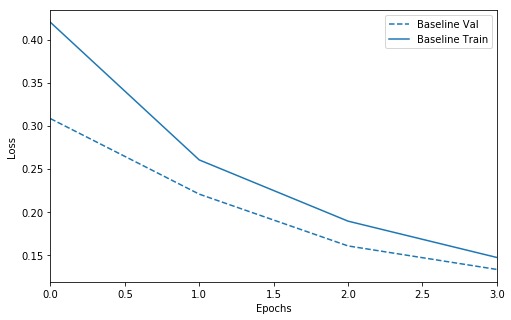

In [13]:
# predict the idx of max , min 

from __future__ import absolute_import, division, print_function, unicode_literals
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as prep 
from IPython.display import display
from tensorflow.keras import backend as K


### sub list ###

def gen_train_label(rows, x_dim, y_dim):
    x_train = np.random.random([rows,x_dim])
    x_label = np.random.random([rows,y_dim])
    x_label.fill(0.0)

    for idx in range(rows):
        e_ = x_train[idx]

#         e_c = ( (e_[0] * 1 + e_[-1] * 2) - 0.66 ) * 1.0
#         e_c = e_[0] + e_[-1]
        x_label[idx][0] = np.argmax(e_)
        x_label[idx][-1] = np.argmin(e_)

    return [x_train, x_label]

def norm_x_y_data(X_train, X_test):
    #import sklearn.preprocessing as prep 
    preprocessor = prep.StandardScaler().fit(X_train)
    X_train = preprocessor.transform(X_train)
    X_test = preprocessor.transform(X_test)
    # X_train_R0=preprocessor.inverse_transform(X_test)    
    return [X_train, X_test, preprocessor]

def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(8,5))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key], '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])



def show_predict(y_test, y_label, y_predict):
    cnt_err = 0
    for i in range(len(y_test)):
        if np.argmax(y_label[i]) != np.argmax(y_predict[i]):
            print (y_test[i])
            print (y_label[i] , " vs " , y_predict[i])
            e_ =  y_test[i]
            print ("- diff is :" , np.abs(np.sqrt(e_[0] * e_[0] + e_[-1] * e_[-1]) - 0.66 ))
            cnt_err += 1
            print()
    print("- cnt error is ", cnt_err)
    print()

def get_mm_filesize(param_num):
    R0 = 33.9765625
    each_size = 0.01171875
    return R0 + param_num * each_size 

def gen_model(x_dim, y_dim):
#     baseline_model.compile(optimizer='adam',
#                        loss='binary_crossentropy',
#                        metrics=['accuracy', 'binary_crossentropy'])    


    baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
#         keras.layers.Dense(8, activation=tf.nn.relu, input_shape=(x_dim,)),
        keras.layers.Dense(128, input_shape=(x_dim,)),
         keras.layers.Dense(128, activation="linear"),
     
        
        keras.layers.Dense(64, activation="relu"),
#         keras.layers.Dropout(0.3),
#         keras.layers.Dense(y_dim, activation=tf.nn.sigmoid)
         keras.layers.Dense(y_dim, activation="relu")

    ])
    
    
    baseline_model.summary()
#     opt = tf.train.AdamOptimizer(learning_rate=0.001)
    
#     baseline_model.compile(
#         optimizer=tf.keras.optimizers.Adam(),

#                 loss=tf.keras.losses.binary_crossentropy,
#                 metrics=['accuracy','binary_crossentropy'])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001/2)
#     optimizer=tf.keras.optimizers.Adam(0.002)

    baseline_model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'binary_crossentropy'])    
    
    return baseline_model    




if __name__ == "__main__":
#     !perl -e "print time"
    preprocessor = None
    import os
    if not os.path.exists("./mm"):
        !mkdir  mm
        !ls mm
    
    
    rows = 10000
    x_dim = 3
    y_dim = 2    
    flag_train = 1
    
    

    key_acc = "acc"
    
    if "WINDIR" in os.environ :
        key_acc = "accuracy"  # my windows   
        
    if "HOME" in os.environ and os.environ["HOME"] == "/home/bgi902":
        key_acc = "accuracy"
    
        

    [x_train, x_label] = gen_train_label(rows, x_dim, y_dim)
    [y_test, y_label] = gen_train_label( int(rows/2), x_dim, y_dim)
    
    
#     [x_train, y_test, preprocessor] = norm_x_y_data(x_train, y_test)
    
    
    if flag_train:
        baseline_model = gen_model(x_dim, y_dim)
        baseline_model.summary()


    #     early_stop = keras.callbacks.EarlyStopping(monitor="val_" + key_acc,  patience=7)
        !perl -e "print time"
        print()
        baseline_history = baseline_model.fit(x_train,
                                          x_label,
                                          epochs=4,
                                          batch_size=200,
                                          validation_data=(y_test, y_label),
    #                                       callbacks=[early_stop],
                                          verbose=0)    

        !perl -e "print time"
        print()


        plot_history( [ ('baseline', baseline_history) ], key="loss") # may be "acc" if gpu
    #     plot_history( [ ('baseline', baseline_history) ], key="binary_crossentropy")

        print(baseline_history.history.keys(), "\n")

        # history to DF
        baseline_history_ = pd.DataFrame(baseline_history.history)
        baseline_history_['epoch'] = baseline_history.epoch
        print(baseline_history_.shape)
        print()
        display(baseline_history_.tail())








    #     show_predict(y_test[s_i], y_label[s_i], y_predict)

        print (baseline_model.evaluate(y_test, y_label))


    if 1:
        if flag_train:
            baseline_model.save('./mm/h5.h5')



            
        baseline_model_new_h5 = tf.keras.models.load_model('./mm/h5.h5')
        #     baseline_model_new_h5.summary()
        print (baseline_model_new_h5.evaluate(y_test, y_label))
        
        
#         print ( baseline_model_new_h5.predict(preprocessor.transform(np.random.random([11,x_dim]))) )
        batch_size = 10
        s_i = np.random.choice(range(len(y_test)), batch_size)

        y_predict = baseline_model_new_h5.predict(y_test[s_i])
        print("______________________")
        
        display(y_test[s_i])
        display(y_label[s_i])
        for i in range(10):
            print(y_test[s_i][i], " => ", np.round(y_predict[i]) , " vs ", y_label[s_i][i])
        
            
        x = y_predict[:,0] + y_predict[:, -1]
        
        print (np.sum(np.abs(x)) / len(x))
        print("______________________")

    if 1:
        tf.saved_model.save(baseline_model, "./mm/1/")   ## save a .pb file

        baseline_model.save_weights('./mm/ckpt')
        baseline_model_new_ckp = gen_model(x_dim, y_dim)
        #     baseline_model_new_ckp.summary()
        baseline_model_new_ckp.load_weights('./mm/ckpt')
        
        print (baseline_model_new_ckp.evaluate(y_test, y_label))
        print (y_test.shape)
        print (y_label.shape)
        print()
        baseline_model_new_ckp.summary()

    print ("- h5 networks filesize is : " , get_mm_filesize(baseline_model.count_params()) , " kbytes")

### lib_ end 


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 24        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 10        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________
1555828547
1555828564
dict_keys(['loss', 'mean_absolute_error', 'binary_crossentropy', 'val_loss', 'val_mean_absolute_error', 'val_binary_crossentropy']) 

(10, 7)



,loss,mean_absolute_error,binary_crossentropy,val_loss,val_mean_absolute_error,val_binary_crossentropy,epoch
5,0.304295,0.452117,-7.150898,0.225649,0.392880,-7.823065,5
6,0.155195,0.325533,-7.931726,0.102338,0.268212,-8.351917,6
7,0.062553,0.207565,-8.315254,0.033277,0.153337,-8.640584,7
8,0.015469,0.099196,-8.528850,0.003561,0.048838,-8.759858,8
9,0.000772,0.016819,-8.586223,0.000008,0.002325,-8.770650,9


5000/5000 [==============================] - 0s 22us/sample - loss: 8.1484e-06 - mean_absolute_error: 0.0023 - binary_crossentropy: -8.7707
[8.148354959848802e-06, 0.0023246892, -8.770651]
5000/5000 [==============================] - 0s 30us/sample - loss: 8.1484e-06 - mean_absolute_error: 0.0023 - binary_crossentropy: -8.7707
[8.148354959848802e-06, 0.0023246892, -8.770651]
______________________
[-0.95834912 -1.59358479  1.30836139]  =>  [ 1.3187398 -1.3206425]  vs  [ 1.32044606 -1.32044606]
[-1.56110295 -1.36699219  1.17375678]  =>  [ 1.0655887 -1.068581 ]  vs  [ 1.06810723 -1.06810723]
[ 1.0124769  -0.99498412 -1.3228312 ]  =>  [ 0.3735069  -0.37202588]  vs  [ 0.37007473 -0.37007473]
[ 0.91167206 -0.00740947 -0.68782699]  =>  [ 0.7087125  -0.70718145]  vs  [ 0.70796612 -0.70796612]
[1.34457604 1.39383896 1.69986099]  =>  [ 2.2088675 -2.2060184]  vs  [ 2.21357387 -2.21357387]
[-1.21492063 -0.62518609  1.3038216 ]  =>  [ 1.2399758 -1.2421987]  vs  [ 1.24353142 -1.24353142]
[-1.210539

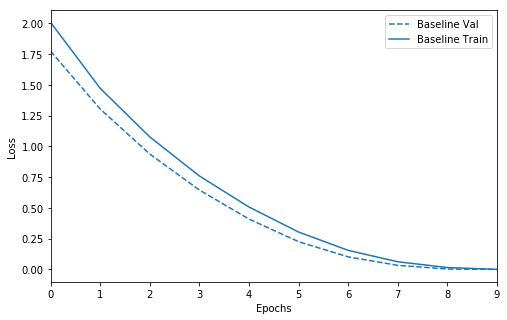

In [0]:
%%time
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as prep 
from IPython.display import display

### sub list ###

def gen_train_label(rows, x_dim, y_dim):
    x_train = np.random.random([rows,x_dim])
    x_label = np.random.random([rows,y_dim])
    x_label.fill(0.0)

    for idx in range(rows):
        e_ = x_train[idx]

        e_c = ( (e_[0] * 1 + e_[-1] * 2) - 0.66 ) * 1.0
#         e_c = e_[0] + e_[-1]
        x_label[idx][0] = e_c
        x_label[idx][-1] = -e_c + 0

    return [x_train, x_label]

def norm_x_y_data(X_train, X_test):
    #import sklearn.preprocessing as prep 
    preprocessor = prep.StandardScaler().fit(X_train)
    X_train = preprocessor.transform(X_train)
    X_test = preprocessor.transform(X_test)
    # X_train_R0=preprocessor.inverse_transform(X_test)    
    return [X_train, X_test, preprocessor]

def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(8,5))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key], '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])



def show_predict(y_test, y_label, y_predict):
    cnt_err = 0
    for i in range(len(y_test)):
        if np.argmax(y_label[i]) != np.argmax(y_predict[i]):
            print (y_test[i])
            print (y_label[i] , " vs " , y_predict[i])
            e_ =  y_test[i]
            print ("- diff is :" , np.abs(np.sqrt(e_[0] * e_[0] + e_[-1] * e_[-1]) - 0.66 ))
            cnt_err += 1
            print()
    print("- cnt error is ", cnt_err)
    print()

def get_mm_filesize(param_num):
    R0 = 33.9765625
    each_size = 0.01171875
    return R0 + param_num * each_size 

def gen_model(x_dim, y_dim):
#     baseline_model.compile(optimizer='adam',
#                        loss='binary_crossentropy',
#                        metrics=['accuracy', 'binary_crossentropy'])    


    baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
#         keras.layers.Dense(8, activation=tf.nn.relu, input_shape=(x_dim,)),
        keras.layers.Dense(6, input_shape=(x_dim,)),
         keras.layers.Dense(4, activation="linear"),
#         keras.layers.Dropout(0.2),
#         keras.layers.Dense(y_dim, activation=tf.nn.sigmoid)
         keras.layers.Dense(y_dim, activation="linear")

    ])
    
    
#     baseline_model.summary()
#     opt = tf.train.AdamOptimizer(learning_rate=0.001)
    
#     baseline_model.compile(
#         optimizer=tf.keras.optimizers.Adam(),

#                 loss=tf.keras.losses.binary_crossentropy,
#                 metrics=['accuracy','binary_crossentropy'])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001/2)
#     optimizer=tf.keras.optimizers.Adam(0.002)

    baseline_model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'binary_crossentropy'])    
    
    return baseline_model    




if __name__ == "__main__":
#     !perl -e "print time"
    preprocessor = None
    import os
    if not os.path.exists("./mm"):
        !mkdir  mm
        !ls mm
    
    
    rows = 10000
    x_dim = 3
    y_dim = 2    
    flag_train = 1
    
    

    key_acc = "acc"
    
    if "WINDIR" in os.environ :
        key_acc = "accuracy"  # my windows   
        
    if "HOME" in os.environ and os.environ["HOME"] == "/home/bgi902":
        key_acc = "accuracy"
    
        

    [x_train, x_label] = gen_train_label(rows, x_dim, y_dim)
    [y_test, y_label] = gen_train_label( int(rows/2), x_dim, y_dim)
    
    
    [x_train, y_test, preprocessor] = norm_x_y_data(x_train, y_test)
    
    
    if flag_train:
        baseline_model = gen_model(x_dim, y_dim)
        baseline_model.summary()


    #     early_stop = keras.callbacks.EarlyStopping(monitor="val_" + key_acc,  patience=7)
        !perl -e "print time"
        print()
        baseline_history = baseline_model.fit(x_train,
                                          x_label,
                                          epochs=10,
                                          batch_size=200,
                                          validation_data=(y_test, y_label),
    #                                       callbacks=[early_stop],
                                          verbose=0)    

        !perl -e "print time"
        print()


        plot_history( [ ('baseline', baseline_history) ], key="loss") # may be "acc" if gpu
    #     plot_history( [ ('baseline', baseline_history) ], key="binary_crossentropy")

        print(baseline_history.history.keys(), "\n")

        # history to DF
        baseline_history_ = pd.DataFrame(baseline_history.history)
        baseline_history_['epoch'] = baseline_history.epoch
        print(baseline_history_.shape)
        print()
        display(baseline_history_.tail())








    #     show_predict(y_test[s_i], y_label[s_i], y_predict)

        print (baseline_model.evaluate(y_test, y_label))


    if 1:
        if flag_train:
            baseline_model.save('./mm/h5.h5')
            
        baseline_model_new_h5 = tf.keras.models.load_model('./mm/h5.h5')
        #     baseline_model_new_h5.summary()
        print (baseline_model_new_h5.evaluate(y_test, y_label))
        
        
#         print ( baseline_model_new_h5.predict(preprocessor.transform(np.random.random([11,x_dim]))) )
        batch_size = 10
        s_i = np.random.choice(range(len(y_test)), batch_size)

        y_predict = baseline_model_new_h5.predict(y_test[s_i])
        print("______________________")
        
#         display(y_test[s_i])
#         display(y_label[s_i])
        for i in range(10):
            print(y_test[s_i][i], " => ", y_predict[i] , " vs ", y_label[s_i][i])
        
            
        x = y_predict[:,0] + y_predict[:, -1]
        
        print (np.sum(np.abs(x)) / len(x))
        print("______________________")

    if 0:
        baseline_model.save_weights('./mm/ckpt')
        baseline_model_new_ckp = gen_model(x_dim, y_dim)
        #     baseline_model_new_ckp.summary()
        baseline_model_new_ckp.load_weights('./mm/ckpt')
        print (baseline_model_new_ckp.evaluate(y_test, y_label))
        baseline_model_new_ckp.summary()

    print ("- h5 networks filesize is : " , get_mm_filesize(baseline_model.count_params()) , " kbytes")

### lib_ end 


1555640767
1555640777
dict_keys(['loss', 'acc', 'binary_crossentropy', 'val_loss', 'val_acc', 'val_binary_crossentropy']) 

(196, 7)



,loss,acc,binary_crossentropy,val_loss,val_acc,val_binary_crossentropy,epoch
191,0.040094,0.98805,0.040094,0.035027,0.9920,0.035027,191
192,0.040437,0.98780,0.040437,0.034645,0.9921,0.034645,192
193,0.039813,0.98745,0.039813,0.034599,0.9925,0.034599,193
194,0.039450,0.98810,0.039450,0.034484,0.9913,0.034484,194
195,0.039548,0.98770,0.039548,0.034046,0.9925,0.034046,195


5000/5000 [==============================] - 0s 23us/sample - loss: 0.0340 - acc: 0.9925 - binary_crossentropy: 0.0340
[0.034046190930902956, 0.9925, 0.034046188]
5000/5000 [==============================] - 0s 43us/sample - loss: 0.0340 - acc: 0.9925 - binary_crossentropy: 0.0340
[0.034046190930902956, 0.9925, 0.034046188]
- h5 networks filesize is :  37.84375  kbytes
CPU times: user 13.3 s, sys: 480 ms, total: 13.8 s
Wall time: 14.1 s


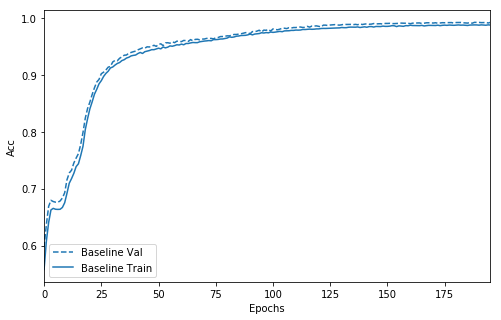

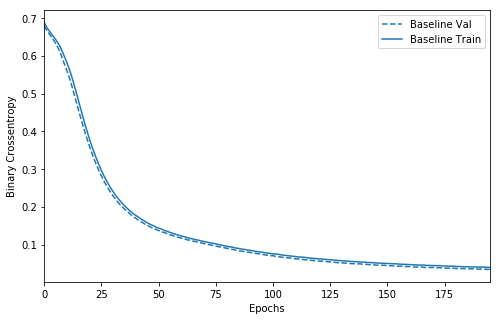

In [0]:
%%time 

### classify ### 
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as prep 
from IPython.display import display

### lib_



def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(8,5))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key], '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

def norm_x_y_data(X_train, X_test):
    #import sklearn.preprocessing as prep 
    preprocessor = prep.StandardScaler().fit(X_train)
    X_train = preprocessor.transform(X_train)
    X_test = preprocessor.transform(X_test)
    # X_train_R0=preprocessor.inverse_transform(X_test)    
    return [X_train, X_test]

def show_predict(y_test, y_label, y_predict):
    cnt_err = 0
    for i in range(len(y_test)):
        if np.argmax(y_label[i]) != np.argmax(y_predict[i]):
            print (y_test[i])
            print (y_label[i] , " vs " , y_predict[i])
            e_ =  y_test[i]
            print ("- diff is :" , np.abs(np.sqrt(e_[0] * e_[0] + e_[-1] * e_[-1]) - 0.66))
            cnt_err += 1
            print()
    print("- cnt error is ", cnt_err)
    print()

def get_mm_filesize(param_num):
    R0 = 33.9765625
    each_size = 0.01171875
    return R0 + param_num * each_size 

def gen_model(x_dim, y_dim):
#     baseline_model.compile(optimizer='adam',
#                        loss='binary_crossentropy',
#                        metrics=['accuracy', 'binary_crossentropy'])    


    baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
        keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(x_dim,)),
        keras.layers.Dense(8, activation=tf.nn.relu),
    #     keras.layers.Dropout(0.2),
        keras.layers.Dense(y_dim, activation=tf.nn.sigmoid) ])
    
    
#     baseline_model.summary()
#     opt = tf.train.AdamOptimizer(learning_rate=0.001)
    
    baseline_model.compile(
        optimizer=tf.keras.optimizers.Adam(),

                loss=tf.keras.losses.binary_crossentropy,
                metrics=['accuracy','binary_crossentropy'])
    
    
    return baseline_model    

def gen_train_label(rows, x_dim, y_dim):
    x_train = np.random.random([rows,x_dim])
    x_label = np.random.random([rows,y_dim])
    x_label.fill(0.0)

    for idx in range(rows):
        e_ = x_train[idx]

        e_c = (np.sqrt(e_[0] * e_[0] + e_[-1] * e_[-1]) > 0.66) * 1.0
        x_label[idx][int(e_c)] = 1.0

    return [x_train, x_label]



if __name__ == "__main__":
#     !perl -e "print time"
    import os
    if not os.path.exists("./mm"):
        !mkdir  mm
        !ls mm
    
    
    rows = 10000
    x_dim = 10
    y_dim = 2    
    

    key_acc = "acc"
    
    if "WINDIR" in os.environ :
        key_acc = "accuracy"  # my windows   
        
#     if "HOME" in os.environ and os.environ["HOME"] == "/home/bgi902":
#         key_acc = "accuracy"
    
        

    [x_train, x_label] = gen_train_label(rows, x_dim, y_dim)
    [y_test, y_label] = gen_train_label( int(rows/2), x_dim, y_dim)
#     [x_train, y_test] = norm_x_y_data(x_train, y_test)
    baseline_model = gen_model(x_dim, y_dim)
    

    early_stop = keras.callbacks.EarlyStopping(monitor="val_" + key_acc,  patience=7)
    !perl -e "print time"
    print()
    baseline_history = baseline_model.fit(x_train,
                                      x_label,
                                      epochs=300,
                                      batch_size=1000,
                                      validation_data=(y_test, y_label),
                                      callbacks=[early_stop],
                                      verbose=0)    
    
    !perl -e "print time"
    print()

    plot_history( [ ('baseline', baseline_history) ], key=key_acc) # may be "acc" if gpu
    plot_history( [ ('baseline', baseline_history) ], key="binary_crossentropy")
    
    print(baseline_history.history.keys(), "\n")

    # history to DF
    baseline_history_ = pd.DataFrame(baseline_history.history)
    baseline_history_['epoch'] = baseline_history.epoch
    print(baseline_history_.shape)
    print()
    display(baseline_history_.tail())
    
    
    batch_size = 1000
    s_i = np.random.choice(range(len(y_test)), batch_size)
    y_predict = baseline_model.predict(y_test[s_i])
#     show_predict(y_test[s_i], y_label[s_i], y_predict)
    
    print (baseline_model.evaluate(y_test, y_label))
    

    if 1:
        baseline_model.save('./mm/h5.h5')
        baseline_model_new_h5 = tf.keras.models.load_model('./mm/h5.h5')
        #     baseline_model_new_h5.summary()
        print (baseline_model_new_h5.evaluate(y_test, y_label))

    if 0:
        baseline_model.save_weights('./mm/ckpt')
        baseline_model_new_ckp = gen_model(x_dim, y_dim)
        #     baseline_model_new_ckp.summary()
        baseline_model_new_ckp.load_weights('./mm/ckpt')
        print (baseline_model_new_ckp.evaluate(y_test, y_label))
        baseline_model_new_ckp.summary()

    print ("- h5 networks filesize is : " , get_mm_filesize(baseline_model.count_params()) , " kbytes")

### lib_ end







32768/30286 [================================] - 0s 1us/step
Instructions for updating:
Use tf.cast instead.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________

....................................................................................................
....................................................................................................
...........................................................................................

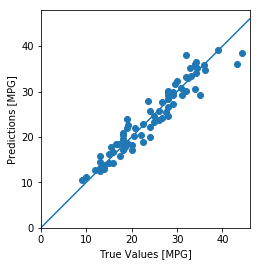


Consider using a TensorFlow optimizer from `tf.train`.
Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  Tr

In [0]:
%%time
# jd add



#   import list
import numpy as np
import pandas as pd
import tensorflow as tf  # tf version = 2.0.0-alpha. with keras
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as prep 
#

np.mat("1,2,3;1,5,6")


dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.isna().sum()
dataset = dataset.dropna()
dataset.isna().sum()
dataset.tail(11)
origin = dataset.pop('Origin')

dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

train_dataset = dataset.sample(frac=0.8, random_state=0)
train_dataset.shape
test_dataset = dataset.drop(train_dataset.index)
test_dataset.shape

# see the table's dist
# sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

train_stats = train_dataset.describe()
train_stats.pop("MPG")

train_stats = train_stats.transpose()
train_stats


train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')
test_labels.tail()


preprocessor = prep.StandardScaler().fit(train_dataset.values)
mycl = train_dataset.columns
np_normed_train_data = preprocessor.transform(train_dataset.values)
np_normed_test_data = preprocessor.transform(test_dataset.values)

normed_train_data = pd.DataFrame(np_normed_train_data, columns=mycl)
normed_test_data = pd.DataFrame(np_normed_test_data, columns=mycl)

# print(normed_train_data)




def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

# normed_train_data = norm(train_dataset)
# normed_train_data.tail()["Cylinders"].loc[281]   # 0.307
# normed_test_data = norm(test_dataset)

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])


  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
 # print(model.batch_size)
  print()
  return model

model = build_model()

model.summary()
normed_train_data.tail()


# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 300

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist.shape)

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


# plot_history(history)
# -----------------------------
# -----------------------------

model_early_stop = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=11)

history_early_stop = model_early_stop.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

# plot_history(history_early_stop)

hist_early_stop = pd.DataFrame(history_early_stop.history)
hist_early_stop['epoch'] = history_early_stop.epoch
print(hist_early_stop.shape)


loss, mae, mse = model_early_stop.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))
print("Testing set Mean Std Error: {:5.2f} MPG".format(mse))

test_predictions = model_early_stop.predict(normed_test_data).flatten()
# print(test_predictions)

print(type(test_labels))
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()


error = test_predictions - test_labels
if 0:
    plt.hist(error, bins = 25)
    plt.xlabel("Prediction Error [MPG]")
    _ = plt.ylabel("Count")

# Save weights to a TensorFlow Checkpoint file
model_early_stop.save_weights('./mm/my_model')


# Restore the model's state,
# this requires a model with the same architecture.
reload_model = build_model()

reload_model.load_weights('./mm/my_model')
reload_model.summary()

reload_test_predictions = reload_model.predict(normed_test_data).flatten()
# print(test_predictions)
print (reload_test_predictions == test_predictions)


model_early_stop.save('./mm/h5.h5')
h5_reload_model = tf.keras.models.load_model('./mm/h5.h5')
h5_reload_model.summary()
h5_reload_test_predictions = h5_reload_model.predict(normed_test_data).flatten()
# print(test_predictions)
print (h5_reload_test_predictions == test_predictions)

# !date "+%Y%m%d_%H%M%S"
# jd end